In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
tf.config.run_functions_eagerly(True)

In [4]:
df=pd.read_csv('goog.csv')

In [5]:
df.head()

,Date,Open,High,Low,Close,Volume
0,12/19/2016,790.219971,797.659973,786.270020,794.200012,1225900
1,12/20/2016,796.760010,798.650024,793.270020,796.419983,925100
2,12/21/2016,795.840027,796.676025,787.099976,794.559998,1208700
3,12/22/2016,792.359985,793.320007,788.580017,791.260010,969100
4,12/23/2016,790.900024,792.739990,787.280029,789.909973,623400


In [6]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [7]:
df.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    61 non-null     object 
 1   Open    61 non-null     float64
 2   High    61 non-null     float64
 3   Low     61 non-null     float64
 4   Close   61 non-null     float64
 5   Volume  61 non-null     int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 3.0+ KB


In [9]:
df.shape

(61, 6)

In [10]:
df.describe()

,Open,High,Low,Close,Volume
count,61.000000,61.000000,61.000000,61.000000,6.100000e+01
mean,814.005573,817.755576,809.734066,814.561804,1.361269e+06
std,18.784303,18.556004,19.384799,19.265955,4.987376e+05
min,778.809998,782.780029,770.409973,771.820007,6.234000e+05
25%,799.679993,802.700012,793.270020,801.340027,1.057900e+06
50%,809.510010,815.250000,804.539978,809.559998,1.247700e+06
75%,828.659973,833.250000,825.059998,830.630005,1.494500e+06
max,851.609985,853.400024,847.109985,852.119995,3.228900e+06


In [11]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

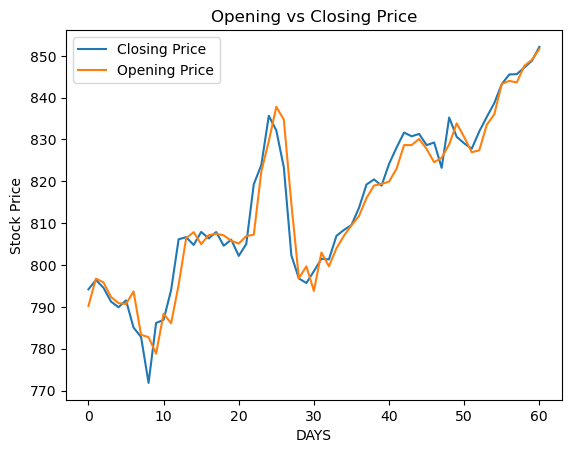

In [28]:
plt.plot(df['Close'], label='Closing Price')
plt.plot(df['Open'], label='Opening Price')
plt.xlabel('DAYS')
plt.ylabel('Stock Price')
plt.title('Opening vs Closing Price')
plt.legend()
plt.show()

In [12]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(df['Close'].values.reshape(-1,1))

In [13]:
train_size=int(len(scaled_data)*0.8)
train_data=scaled_data[:train_size]
test_data=scaled_data[train_size:]

In [14]:
def create_sequences(data,time_steps=6):
    x=[]
    y=[]
    for i in range(len(data)-time_steps):
        x.append(data[i:i+time_steps,0])
        y.append(data[i+time_steps,0])
    return np.array(x),np.array(y)

In [15]:
x_train,y_train=create_sequences(train_data)
x_test,y_test=create_sequences(test_data)

In [17]:
model=Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mse')

c:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 6, 50)          │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
model.fit(x_train,y_train,epochs=50, batch_size=4)

Epoch 1/50


c:\Users\ASUS\anaconda3\Lib\site-packages\tensorflow\python\data\ops\structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 160ms/step - loss: 0.1950
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 156ms/step - loss: 0.0410
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 155ms/step - loss: 0.0326
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 155ms/step - loss: 0.0231
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 160ms/step - loss: 0.0189
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 156ms/step - loss: 0.0316
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 158ms/step - loss: 0.0222
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 162ms/step - loss: 0.0251
Epoch 9/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 157ms/step - loss: 0.0303
Epoch 10/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 165ms/step - loss: 0.0173
Epoch 11/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 160ms/step - loss: 0.0190
Epoch 12/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 158ms/step - loss: 0.0261
Epoch 13/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 162ms/step - loss: 0.0196
Epoch 14/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 158ms/step - loss: 0.0197
Epoch 15/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 156ms/step - loss: 0.0203


In [20]:
y_pred=model.predict(x_test)
y_pred=scaler.inverse_transform(y_pred)
y_test=scaler.inverse_transform(y_test.reshape(-1,1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


c:\Users\ASUS\anaconda3\Lib\site-packages\tensorflow\python\data\ops\structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


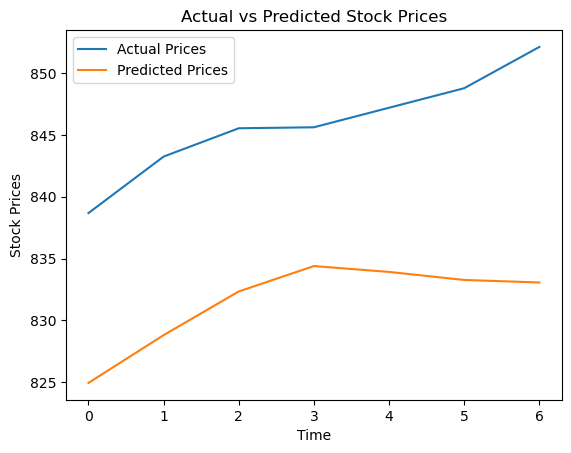

In [22]:
plt.plot(y_test, label='Actual Prices')
plt.plot(y_pred, label='Predicted Prices')
plt.xlabel('Time')
plt.ylabel('Stock Prices')
plt.title('Actual vs Predicted Stock Prices')
plt.legend()
plt.show()

In [23]:
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)

print('Mean Absolute Error : ',mae)
print('Mean Squared Error : ',mse)
print('Root Mean Squared Error : ',rmse)

Mean Absolute Error :  14.35027197935267
Mean Squared Error :  211.08633741871986
Root Mean Squared Error :  14.528810598900375


In [24]:
last_6_days=df['Close'][-6:].values
last_6_days_scaled=scaler.transform(last_6_days.reshape(-1,1))
x_pred=[]
x_pred.append(last_6_days_scaled)
x_pred=np.array(x_pred)
x_pred=np.reshape(x_pred,(x_pred.shape[0],x_pred.shape[1],1))

In [25]:
pred_price=model.predict(x_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


c:\Users\ASUS\anaconda3\Lib\site-packages\tensorflow\python\data\ops\structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


In [26]:
pred_price=scaler.inverse_transform(pred_price)
print('The Predicted Stock Price for the next day is : ', pred_price)

The Predicted Stock Price for the next day is :  [[834.29767]]
